# Analysing Used iPhone Market

- The main aim of this project is to analyse the used iPhone market in Lithuania.

- The dataset used was scraped from a Lithuanian advertisement platform for primarily used items (Skelbiu) in December, 2025. The dataset describes used iPhone listings (views, likes, description) and phone attributes (model, condition, price, etc).

### Libraries

In [187]:
import regex as re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

### Dataset

In [188]:
iphones = pd.read_csv('./iphones20251227.csv', parse_dates=['registration_date'])

## Dataset overview

In [189]:
iphones

,id,name,maker,model,condition,price,city,views,likes,description,url,stars,sold,sale_time,last_update,registration_date,n_listings,seller_verified
0,82852315.0,iPhone 15 pro max 256gb,Apple,iPhone 15 Pro Max,Naudota,650.0,Vilnius,0.0,0.0,"iPhone 15 Pro Max 256GB, 89% baterija, puikios...",https://www.skelbiu.lt/skelbimai/iphone-15-pro...,1.0,False,NaN,Atnaujintas prieš 2 min.,2018-09-01,58.0,True
1,82852217.0,iPhone 14 pro max,Apple,iPhone 14 Pro Max,Naudota,515.0,Šiauliai,2.0,0.0,"Parduodamas „iPhone 14 Pro Max“. 256 GB, 84 % ...",https://www.skelbiu.lt/skelbimai/iphone-14-pro...,NaN,False,NaN,Atnaujintas prieš 19 min.,2021-11-01,31.0,False
2,82852209.0,iPhone 14,Apple,iPhone 14,Naudota,300.0,Vilnius,11.0,1.0,Iphone 14 128GB Blue. Baterija 90%. Pilnos kom...,https://www.skelbiu.lt/skelbimai/iphone-14-828...,1.0,False,NaN,Atnaujintas prieš 20 min.,2015-04-01,4.0,True
3,82852065.0,iPhone 14 pro 128gb,Apple,iPhone 14 Pro,Naudota,470.0,Klaipėda,3.0,0.0,"Parduodu iPhone 14 Pro 128 GB, telefonas tvark...",https://www.skelbiu.lt/skelbimai/iphone-14-pro...,NaN,False,NaN,Atnaujintas prieš 21 min.,2014-11-01,203.0,True
4,82852055.0,iPhone 16 128gb,Apple,iPhone 16,Naudota,540.0,Šiauliai,15.0,3.0,Idealaus stovio. 128GB\nViskas originalu nieka...,https://www.skelbiu.lt/skelbimai/iphone-16-128...,NaN,False,NaN,Atnaujintas prieš 28 min.,2021-03-01,66.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,82507175.0,"Parduodu, labai geros būklės",Apple,iPhone 12,Naudota,200.0,Marijampolė,227.0,2.0,"Zalias, 128gb",https://www.skelbiu.lt/skelbimai/parduodu-laba...,NaN,False,NaN,Atnaujintas prieš 1 d.,2025-10-01,5.0,True
3378,82845939.0,Iphonas 11pro max,Apple,iPhone 11 Pro Max,Naudota,140.0,Vilnius,27.0,3.0,Iphonas pro max 11 baterija 79,https://www.skelbiu.lt/skelbimai/iphonas-11pro...,NaN,False,NaN,Atnaujintas prieš 1 d.,2021-11-01,16.0,True
3379,82616093.0,Geros bukles,Apple,iPhone 13,Naudota,200.0,Vilnius,123.0,5.0,jokiu ibrezimu veikia puikiai.,https://www.skelbiu.lt/skelbimai/geros-bukles-...,NaN,False,NaN,Atnaujintas prieš 1 d.,2016-07-01,16.0,True
3380,82822955.0,Bukle 10/10,Apple,iPhone 13 Pro Max,Naudota,330.0,Kaunas,75.0,0.0,Baterija 86 128 gb,https://www.skelbiu.lt/skelbimai/bukle-10-10-8...,NaN,False,NaN,Atnaujintas prieš 10 val.,2021-02-01,8.0,True


There are no mistakes caused by reading the dataset. Everything looks normal.

In [190]:
iphones[iphones.duplicated()].head()

,id,name,maker,model,condition,price,city,views,likes,description,url,stars,sold,sale_time,last_update,registration_date,n_listings,seller_verified
24,82850887.0,"iPhone 13 Pro ,Idealios Būklės",Apple,iPhone 13 Pro,Naudota,350.0,Klaipėda,31.0,3.0,Labai tvarkingas be ibrezimu.\nDežute.,https://www.skelbiu.lt/skelbimai/iphone-13-pro...,1.0,False,NaN,Atnaujintas prieš 2 val.,2023-12-01,1.0,True
60,82851417.0,iPhone 14 Pro Max. Battery Health 94%,Apple,iPhone 14 Pro Max,Naudota,450.0,Vilnius,29.0,0.0,Parduodu puikiai išlaikytą iPhone 14 Pro Max 1...,https://www.skelbiu.lt/skelbimai/iphone-14-pro...,1.0,False,NaN,Atnaujintas prieš 2 val.,2025-04-01,68.0,False
288,82822199.0,iPhone 16pro 128gb,Apple,iPhone 16 Pro,Naudota,480.0,Vilnius,267.0,10.0,"Parduodamas iphone 16pro 128gb , skilęs ekrana...",https://www.skelbiu.lt/skelbimai/iphone-16pro-...,NaN,False,NaN,Atnaujintas prieš 11 val.,2023-09-01,124.0,True
312,82202426.0,iPhone 14,Apple,iPhone 14,Naudota,400.0,Klaipėda,136.0,2.0,Labai geros būklės Iphone 14 128GB\nBaterija 8...,https://www.skelbiu.lt/skelbimai/iphone-14-822...,NaN,False,NaN,Atnaujintas prieš 6 val.,2010-02-01,3328.0,True
386,76432825.0,iPhone 16 Pro 256gb open box garantija,Apple,iPhone 16 Pro,Nauja,900.0,Vilnius,3000.0,38.0,"naujas, su garantija:\niPhone 16 Pro 256GB des...",https://www.skelbiu.lt/skelbimai/iphone-16-pro...,NaN,False,NaN,Atnaujintas prieš 7 val.,2014-10-01,10750.0,True


There are quite a few rows that are duplicated. The website that was scraped sometimes shows ads that appeared is the previous page. We will remove them.

In [191]:
iphones = iphones.drop_duplicates()

In [192]:
iphones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, 0 to 3381
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3342 non-null   float64       
 1   name               3342 non-null   object        
 2   maker              3342 non-null   object        
 3   model              3342 non-null   object        
 4   condition          3340 non-null   object        
 5   price              3280 non-null   float64       
 6   city               3225 non-null   object        
 7   views              3342 non-null   float64       
 8   likes              3342 non-null   float64       
 9   description        3162 non-null   object        
 10  url                3342 non-null   object        
 11  stars              94 non-null     float64       
 12  sold               3342 non-null   bool          
 13  sale_time          117 non-null    object        
 14  last_update  

We are left with 3342 ads. Some columns have missings values: there are listings that did not provide a price, the vast majority of listings did not have any 'starts' (were not promoted by the seller) and so on. The `seller_verified` column should be boolean, we will fix that later.

## Column overview

We can now move to individual columns analysis.

### ID

In [193]:
iphones['id']

0       82852315.0
1       82852217.0
2       82852209.0
3       82852065.0
4       82852055.0
           ...    
3377    82507175.0
3378    82845939.0
3379    82616093.0
3380    82822955.0
3381    82836327.0
Name: id, Length: 3342, dtype: float64

Each listing is assigned a unique ID and it is visible on the website.

In [194]:
iphones[iphones['id'].duplicated()].shape[0]

20

Checking for futher duplicates based on ID, 20 rows come up. These also have to be removed.

In [195]:
iphones = iphones.drop_duplicates(subset='id', keep='last')

### Name

In [196]:
iphones['name']

0                                 iPhone 15 pro max 256gb
16                           iPhone 13 128gb 86%baterijos
17      Idelaus stovio iPhone 14 Pro Max Space Black 1...
18                  iPhone 14 Pro Max. Battery Health 94%
21                         iPhone 13 Pro ,Idealios Būklės
                              ...                        
3377                         Parduodu, labai geros būklės
3378                                    Iphonas 11pro max
3379                                         Geros bukles
3380                                          Bukle 10/10
3381                                   Stovis labai geras
Name: name, Length: 3322, dtype: object

Names do not necessarily describe what is being advertised. Some names are set as 'Conditions very good' ('Stovis labai geras'), but others do have useful additional information that could be extracted such as storage capacity, color, battery health, etc.

### Model

In [197]:
iphones['model'].value_counts().head(10)

model
iPhone 13            276
iPhone 14 Pro        199
iPhone 11            194
iPhone 14 Pro Max    194
iPhone 13 Pro        181
iPhone 15 Pro Max    176
iPhone 12            153
iPhone 14            149
iPhone 13 Pro Max    142
iPhone 12 Pro        134
Name: count, dtype: int64

In [198]:
iphones['model'].unique()

array(['iPhone 15 Pro Max', 'iPhone 13', 'iPhone 14 Pro Max',
       'iPhone 13 Pro', 'iPhone 14 Pro', 'iPhone 15 Pro',
       'iPhone 13 Pro Max', 'iPhone 17 Pro Max', 'iPhone 11',
       'iPhone 16 Pro Max', 'iPhone 12 Pro Max', 'iPhone 14 Plus',
       'iPhone 15', 'iPhone 15 Plus', 'iPhone SE', 'iPhone 17',
       'iPhone 11 Pro', 'iPhone 14', 'iPhone 16 Pro', 'iPhone 12 Pro',
       'iPhone 13 mini', 'iPhone 16', 'iPhone X', 'iPhone 12 mini',
       'iPhone 5S', 'iPhone 6S', 'iPhone 12', 'iPhone XS', 'iPhone 16e',
       'iPhone 8 Plus', 'iPhone XR', 'iPhone 7', 'iPhone 5', 'iPhone 4S',
       'iPhone 6', 'iPhone 8', 'iPhone 3GS', 'iPhone SE (2020)',
       'iPhone 17 Pro', 'iPhone XS Max', 'iPhone 7 Plus', 'iPhone Air',
       'iPhone 3G', 'iPhone 16 Plus', 'iPhone 6S Plus',
       'iPhone 11 Pro Max', 'iPhone SE (2022)', 'iPhone 6 Plus',
       'iPhone 4', 'iPhone 5C'], dtype=object)

Practically all models are available, going back as far as the iPhone 3. The most common listing is for the iPhone 13, closely followed by two iPhone 14 variants and iPhone 11. Grouping iPhone variants could paint a clearer picture.

In [199]:
model_mapping = {
    "iPhone 15 Pro Max": "iPhone 15",
    "iPhone 13": "iPhone 13",
    "iPhone 14 Pro Max": "iPhone 14",
    "iPhone 13 Pro": "iPhone 13",
    "iPhone 14 Pro": "iPhone 14",
    "iPhone 15 Pro": "iPhone 15",
    "iPhone 13 Pro Max": "iPhone 13",
    "iPhone 17 Pro Max": "iPhone 17",
    "iPhone 11": "iPhone 11",
    "iPhone 16 Pro Max": "iPhone 16",
    "iPhone 12 Pro Max": "iPhone 12",
    "iPhone 14 Plus": "iPhone 14",
    "iPhone 15": "iPhone 15",
    "iPhone 15 Plus": "iPhone 15",
    "iPhone SE": "iPhone SE",
    "iPhone 17": "iPhone 17",
    "iPhone 11 Pro": "iPhone 11",
    "iPhone 14": "iPhone 14",
    "iPhone 16 Pro": "iPhone 16",
    "iPhone 12 Pro": "iPhone 12",
    "iPhone 13 mini": "iPhone 13",
    "iPhone 16": "iPhone 16",
    "iPhone X": "iPhone X",
    "iPhone 12 mini": "iPhone 12",
    "iPhone 5S": "iPhone 5",
    "iPhone 6S": "iPhone 6",
    "iPhone 12": "iPhone 12",
    "iPhone XS": "iPhone X",
    "iPhone 16e": "iPhone 16",
    "iPhone 8 Plus": "iPhone 8",
    "iPhone XR": "iPhone X",
    "iPhone 7": "iPhone 7",
    "iPhone 5": "iPhone 5",
    "iPhone 4S": "iPhone 4",
    "iPhone 6": "iPhone 6",
    "iPhone 8": "iPhone 8",
    "iPhone 3GS": "iPhone 3",
    "iPhone SE (2020)": "iPhone SE (2020)",
    "iPhone 17 Pro": "iPhone 17",
    "iPhone XS Max": "iPhone X",
    "iPhone 7 Plus": "iPhone 7",
    "iPhone Air": "iPhone Air",
    "iPhone 3G": "iPhone 3",
    "iPhone 16 Plus": "iPhone 16",
    "iPhone 6S Plus": "iPhone 6",
    "iPhone 11 Pro Max": "iPhone 11",
    "iPhone SE (2022)": "iPhone SE (2022)",
    "iPhone 6 Plus": "iPhone 6",
    "iPhone 4": "iPhone 4",
    "iPhone 5C": "iPhone 5"
}

In [200]:
release_year_mapping = {
    "iPhone 3": 2008,
    "iPhone 4": 2010,
    "iPhone 5": 2012,
    "iPhone 6": 2014,
    "iPhone 7": 2016,
    "iPhone SE": 2016,
    "iPhone 8": 2017,
    "iPhone X": 2017,
    "iPhone 11": 2019,
    "iPhone 12": 2020,
    "iPhone SE (2020)": 2020,
    "iPhone 13": 2021,
    "iPhone 14": 2022,
    "iPhone SE (2022)": 2022,
    "iPhone 15": 2023,
    "iPhone 16": 2024,
    "iPhone 17": 2025,
    "iPhone Air": 2025
}

In [201]:
iphones = iphones.assign(base_model = (iphones['model']
                                       .map(model_mapping)))

In [202]:
iphones = iphones.assign(base_release = (iphones['base_model']
                                         .map(release_year_mapping)))

In [203]:
iphones_no_se = iphones[~(iphones['base_model'].isin(['iPhone SE (2020)', 'iPhone SE (2022)']))]

/var/folders/l1/t93y2fns7r99qn6s0phqmdr80000gn/T/ipykernel_36549/1780743372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


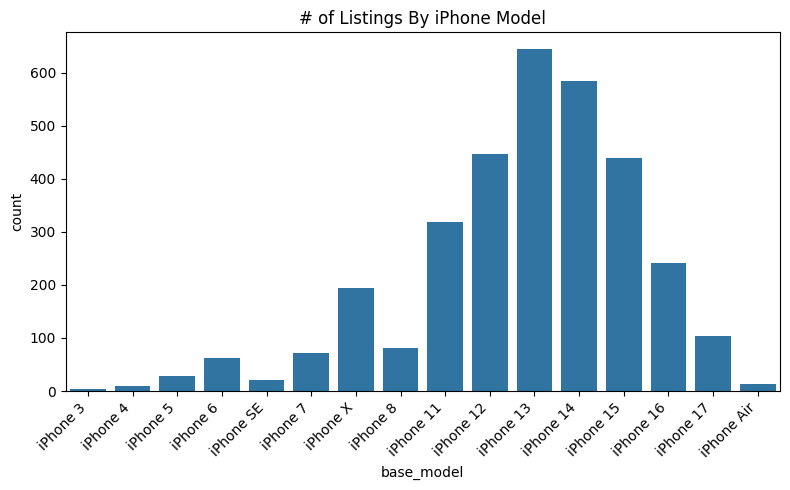

In [204]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

sns.countplot(data=iphones_no_se, x='base_model', order=iphones_no_se.sort_values('base_release')['base_model'])

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

ax.set_title('# of Listings By iPhone Model')

plt.tight_layout()
plt.show()

When dismissing SE models that are not very popular in the second hand market, a trend becomes clear. iPhones that were released 3-4 years ago are the most listed with models release right before/after that period following second in popularity. This could be indicating that iPhone users in Lithuania usually switch phones after 3-4 years.

### Condition

In [205]:
iphones['condition'].value_counts(dropna=False)

condition
Naudota    3035
Nauja       285
NaN           2
Name: count, dtype: int64

There are a total of 2 condition values: used (Naudota) and new (Nauja). 2 rows have missing values.

In [206]:
iphones[iphones['condition'].isna()]

,id,name,maker,model,condition,price,city,views,likes,description,url,stars,sold,sale_time,last_update,registration_date,n_listings,seller_verified,base_model,base_release
3059,82714929.0,Parduodamas idealios bukles iPhone 16pro Max,Apple,iPhone 16 Pro Max,NaN,NaN,Kaunas,122.0,5.0,"telefonas idealios bukles, naudotas 8 menesius...",https://www.skelbiu.lt/skelbimai/parduodamas-i...,NaN,False,NaN,Atnaujintas gruodžio 14 d.,2025-12-01,1.0,True,iPhone 16,2024
3292,81469789.0,"Parduodu iPhone,7.arba Keiciu I Didesni.45,eur.",Apple,iPhone 7,NaN,NaN,Vilnius,59.0,0.0,Bukle naudota 10.viskas veikia baterija gera n...,https://www.skelbiu.lt/skelbimai/parduodu-ipho...,NaN,False,NaN,Atnaujintas rugsėjo 28 d.,2025-07-01,7.0,True,iPhone 7,2016


A look at their descriptions tells us that both of them are used.

In [207]:
iphones.loc[3059, 'condition'] = 'Naudota'
iphones.loc[3292, 'condition'] = 'Naudota'

### City

In [208]:
iphones['city'].value_counts()

city
Vilnius                     1319
Kaunas                       681
Klaipėda                     273
Šiauliai                     232
Panevėžys                     93
                            ... 
Vilnius, Kupiškio r.           1
Plungės r., Klaipėda           1
Rietavas                       1
Druskininkai, Lazdijų r.       1
Pagėgiai                       1
Name: count, Length: 121, dtype: int64

Most common city is Vilnius, the largest city and the capital of Lithuania. Other iPhones are purchasable either in smaller towns or multiple locations.

/var/folders/l1/t93y2fns7r99qn6s0phqmdr80000gn/T/ipykernel_36549/2546268008.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


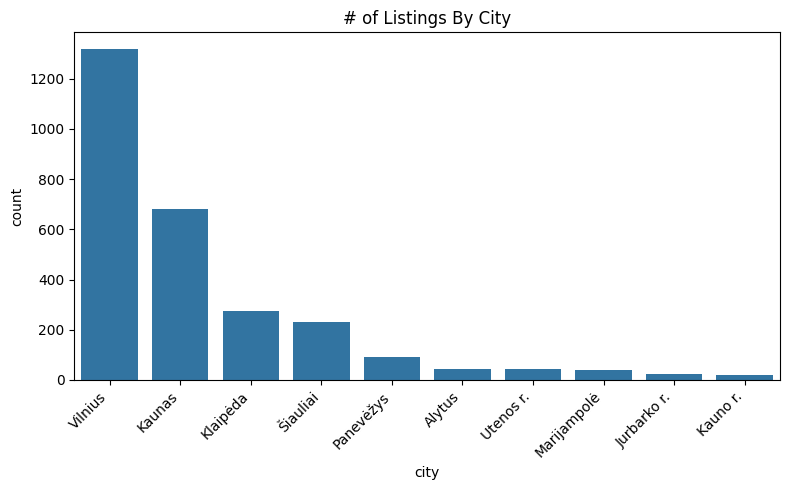

In [209]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

sns.countplot(data=iphones, x='city', order=iphones.city.value_counts().iloc[:10].index)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

ax.set_title('# of Listings By City')

plt.tight_layout()
plt.show()

There are large drop offs in iPhone count right after the 1st and 2nd city.

### Views & likes

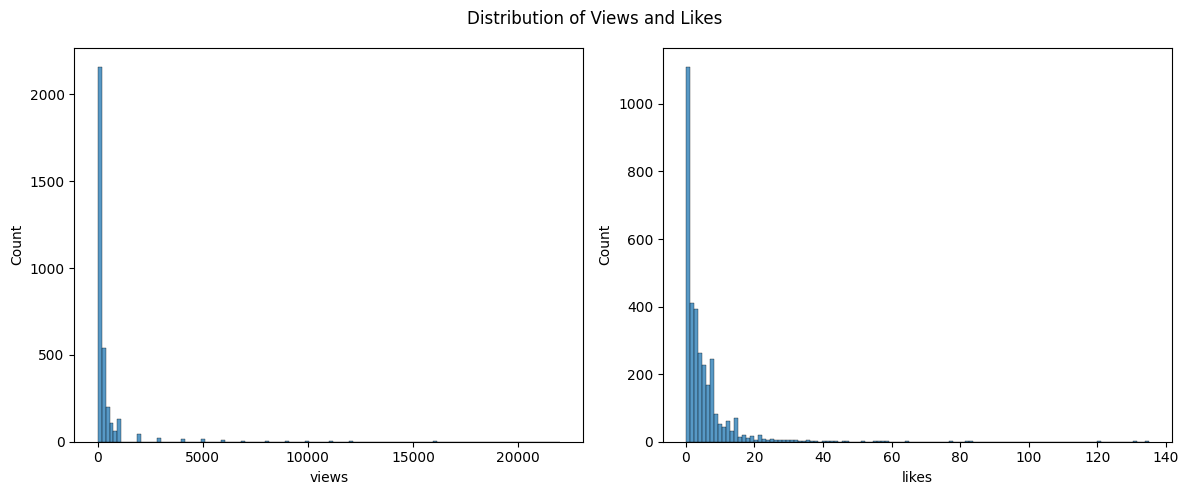

In [210]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=iphones, x='views', ax=axes[0])

sns.histplot(data=iphones, x='likes', ax=axes[1])

fig.suptitle('Distribution of Views and Likes')

plt.tight_layout()
plt.show()

In [211]:
(iphones['views'] < 800).sum() / len(iphones['views'])

np.float64(0.9099939795304034)

In [212]:
(iphones['likes'] < 20).sum() / len(iphones['likes'])

np.float64(0.9674894641782059)

Listings rarely pass 800 views or have more than 20 likes. Since most listings are individual items posted by private sellers, ads are a one-and-done process.

Let's now look at how views and likes are distributed with respect to listings. The distributions are heavily skewed, so we will use medians instead of means.

In [213]:
iphones['views'].median()

np.float64(123.0)

In [214]:
iphones['likes'].median()

np.float64(3.0)

The median post gets 123 views and 3 likes.

In [215]:
iphones['views'].sort_values(ascending=False).head(int(len(iphones)*(5/100))).sum() / iphones['views'].sum()

np.float64(0.5035789218303458)

Interestingly, the top 5% of listings account for 50% views. Views are quite concentrated, meaning other listings might not be getting as much attention as they deserve.

In [216]:
iphones['likes'].sort_values(ascending=False).head(int(len(iphones)*(10/100))).sum() / iphones['likes'].sum()

np.float64(0.42565887618100445)

Similar is true for likes: top 10% of most likes listings represent 43% of all likes.

### Description

In [217]:
iphones.loc[0, 'description']

'iPhone 15 Pro Max 256GB, 89% baterija, puikios būklės\n\nParduodamas iPhone 15 Pro Max 256 GB, puikiai veikiantis, naudotas atsakingai. Telefonas techniškai idealus viskas veikia be priekaištų, Face ID, kameros, garsas, ryšys.\n\nBaterijos būklė – 89% (laiko visą dieną be problemų)\nAtmintis – 256 GB\nJokių remontų, neardytas, originalios detalės\nICloud nuimtas, paruoštas naujam savininkui\n\nBūklė:\nKorpusas idealus, be skilimų ar įbrėžimų.\nYra keli smulkūs ekrano įbrėžimai (netrukdo naudojimui, nepastebimi).\n\n\nFlagmanas su titaniniu korpusu lengvas ir itin tvirtas\nItin gera kamera (puikios nuotraukos ir video)\nGreitas ir sklandus veikimas be jokių lagų\nDidelis ir ryškus ekranas patogu žiūrėti video, dirbti, žaisti\n\nGalimas patikrinimas gyvai, siunčiu ir paštu.\nJei reikia atsiųsiu daugiau nuotraukų ar video.'

As stated before, descriptions and listing names usually have useful information such as storage capacity or battery health. We can extract these feature from text with regexes.

In [218]:
def extract_storage(description):
    if not isinstance(description, str):
        return None

    storage = re.search(r'(\d{1,4})\s*([gGtT][bB])', description)

    if storage:
        return f"{storage.group(1)}{storage.group(2).upper()}"
    return None
    
def extract_battery(description):
    if not isinstance(description, str):
        return None
    
    battery = re.search(r'([1-9]\d{1,2})\s*%', description)
    
    if battery:
        return battery.group(1)
    return None

In [219]:
iphones = iphones.assign(storage_size = (iphones['name'] + ' ' + iphones['description']).apply(extract_storage))

iphones = iphones.assign(battery_health = (iphones['name'] + ' ' + iphones['description']).apply(extract_battery))

In [220]:
iphones['storage_size'].value_counts(dropna=False).head()

storage_size
128GB    1123
256GB     762
None      756
64GB      408
512GB     135
Name: count, dtype: int64

In [221]:
iphones['battery_health'].value_counts(dropna=False).head()

battery_health
None    1625
100      216
86       142
85       136
84       105
Name: count, dtype: int64

### Promoted listings

In [222]:
iphones['stars'].value_counts(dropna=False)

stars
NaN    3231
1.0      90
2.0       1
Name: count, dtype: int64

It is rare for advertisements to be promoted. Only a single listings was promoted with 2 stars.

### Sold listings

In [223]:
iphones['sold'].value_counts(dropna=False)

sold
False    3206
True      116
Name: count, dtype: int64

Items that are sold are still shown on the website in order to encourage users to create listings themselves. In total, there are 3206 active listings.

In [224]:
iphones[~iphones['sale_time'].isna()]['sale_time'].value_counts()

sale_time
Parduota                45
Parduota per 5 d.        9
Parduota per 3 d.        9
Parduota per 2 d.        7
Parduota per 4 d.        6
Parduota per 8 d.        5
Parduota per 1 d.        5
Parduota per 7 d.        4
Parduota per 9 d.        3
Parduota per 6 d.        3
Parduota per 21 val.     2
Parduota per 1 val.      2
Parduota per 13 val.     2
Parduota per 16 val.     1
Parduota per 3 val.      1
Parduota per 8 val.      1
Parduota per 10 d.       1
Parduota per 2 val.      1
Parduota per 14 val.     1
Parduota per 47 min.     1
Parduota per 2 min.      1
Parduota per 8 min.      1
Parduota per 37 min.     1
Parduota per 50 min.     1
Parduota per 43 min.     1
Parduota per 9 val.      1
Parduota per 4 val.      1
Name: count, dtype: int64

For items that were sold, a time since sale is shown in the advert. There are 2 abnormal sale times of 2 and 8 minutes. That is not possible and should be removed. Other values should be standartized into hours.

In [225]:
def standartized_sale_time(input):
    if not isinstance(input, str):
        return None

    time = re.search(r'\d+', input)

    if time:
        time = float(time.group())
    else:
        return None

    if 'd.' in input:
        return time*24
    elif 'val.' in input:
        return time
    else:
        return time/60

In [226]:
iphones['sale_time_hours'] = iphones['sale_time'].apply(standartized_sale_time)

In [227]:
iphones['sale_time_hours'].value_counts().head()

sale_time_hours
72.0     9
120.0    9
48.0     7
96.0     6
24.0     5
Name: count, dtype: int64

### Last update

In [228]:
iphones['last_update'].value_counts()

last_update
Atnaujintas prieš 1 d.         639
Atnaujintas gruodžio 23 d.     207
Atnaujintas prieš 10 val.      164
Atnaujintas gruodžio 22 d.     162
Atnaujintas prieš 3 d.         134
                              ... 
Atnaujintas prieš 37 min.        1
Atnaujintas prieš 25 min.        1
Atnaujintas rugsėjo 13 d.        1
Atnaujintas rugpjūčio 24 d.      1
Atnaujintas rugsėjo 25 d.        1
Name: count, Length: 160, dtype: int64

Skelbiu.lt also has a feature where a seller can update their listings every 24 hours without making any changes to make their listing more visible.

### Seller atributes

Finally, there are 3 attributes in ads that describe the seller: registration date, number of listings and verification status.

In [229]:
iphones['registration_date'].value_counts()

registration_date
2025-12-01    134
2025-11-01     87
2025-10-01     80
2018-01-01     75
2010-07-01     63
             ... 
2012-09-01      1
2013-10-01      1
2012-01-01      1
2010-11-01      1
2006-12-01      1
Name: count, Length: 221, dtype: int64

Interestingly, most accounts were created in the past month. This could be further investigated by checking if these are real or malicious users.

In [230]:
iphones['n_listings'].value_counts()

n_listings
1.0       150
2.0       138
3.0       133
4.0        84
5.0        74
         ... 
2250.0      1
554.0       1
821.0       1
2549.0      1
484.0       1
Name: count, Length: 467, dtype: int64

Most succesfully scraped active sellers have posted 3 or less adverts.

As stated in the beginning, the `seller_verified` variable needs to be converted to a boolean.

In [231]:
iphones['seller_verified'] = iphones['seller_verified'].map({True:1, False:0}).astype(bool)

In [232]:
iphones['seller_verified'].value_counts(dropna=False)

seller_verified
True     2467
False     855
Name: count, dtype: int64

Most sellers are verified, meaning they have spent 0.1 euros or less on the platform.

### Price

In [233]:
iphones['price_log'] = np.log(iphones['price'])

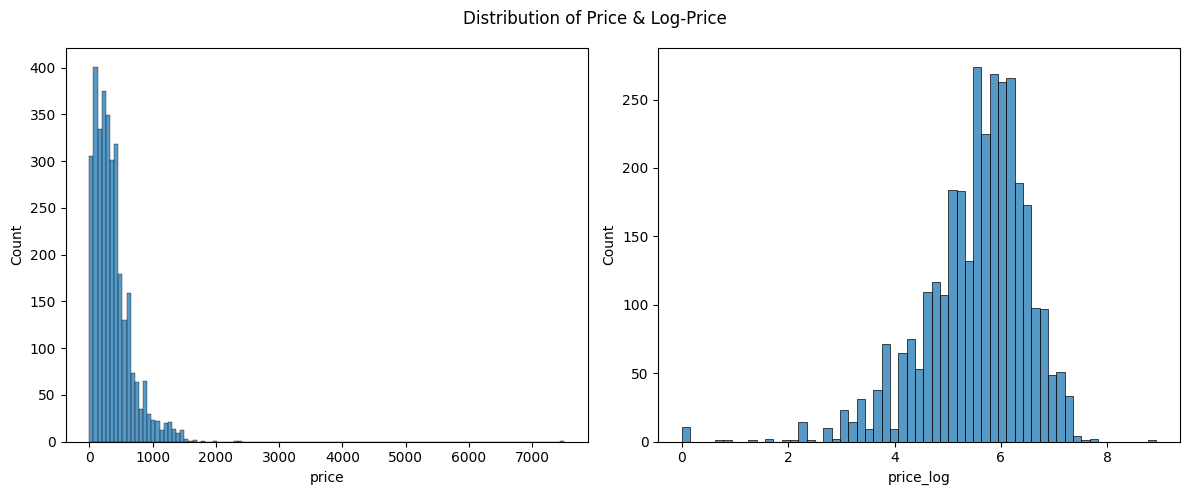

In [234]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=iphones, x='price', ax=axes[0])

sns.histplot(data=iphones, x='price_log', ax=axes[1])

fig.suptitle('Distribution of Price & Log-Price')

plt.tight_layout()
plt.show()

In [235]:
sum(iphones['price'].dropna() < 1000) / iphones['price'].shape[0]

0.9406983744732089

The distribution of iPhone price shows that for 94% of iPhones their price drops below 1000 euros before they are listed on the second-hand market.

Prices above 1800 euros seem suspiciously high.

In [236]:
iphones[iphones['price'] > 1800]

,id,name,maker,model,condition,price,city,views,likes,description,...,last_update,registration_date,n_listings,seller_verified,base_model,base_release,storage_size,battery_health,sale_time_hours,price_log
537,82537211.0,Naujas iPhone 17 pro max 2tb,Apple,iPhone 17 Pro Max,Nauja,2000.0,Vilnius,218.0,1.0,Naujas neišpakuotas iPhone 17 pro ma,...,Atnaujintas gruodžio 14 d.,2025-11-01,5.0,False,iPhone 17,2025,2TB,None,NaN,7.600902
1177,82831675.0,Naujas iPhone 17 Pro Max 2 TB Deep Blue,Apple,iPhone 17 Pro Max,Nauja,2300.0,Šiauliai,313.0,2.0,"Parduodamas naujas, neišpakuotas iPhone 17 Pro...",...,Atnaujintas prieš 3 d.,2022-07-01,9.0,True,iPhone 17,2025,2TB,None,NaN,7.740664
2987,82232002.0,"iPhone 17 Pro Max, 2t",Apple,iPhone 17 Pro Max,Naudota,2400.0,Vilnius,422.0,4.0,Naudotas nuo 2025.09.26 iki dabar.\nDu terabai...,...,Atnaujintas prieš 11 val.,2023-03-01,18.0,True,iPhone 17,2025,None,None,NaN,7.783224
3296,82351320.0,Labai gero stovio kaip naujais. Labai mylėtas ...,Apple,iPhone 15 Pro Max,Naudota,7500.0,Klaipėda,161.0,1.0,"Melinos spalvos ,Visada turejome apsaugas laba...",...,Atnaujintas lapkričio 17 d.,2016-12-01,16.0,True,iPhone 15,2023,500GB,None,NaN,8.922658


There were only 4 iPhones that exceeded a price of 1800 euros. Three of them were the newest iPhone models at the time of analysis (iPhone 17 Pro Max) with a large storage option - 2 terabytes. They are, in fact, more expensive than their new equivalents which cost 2000 euros at the time of analysis. The price of the remaining listing is likely a mistake and should not be analysed.

In [237]:
iphones = iphones[iphones['price'] != 7500]

Price values that are too low should also be checked.

In [238]:
iphones[iphones['price'] < 10]

,id,name,maker,model,condition,price,city,views,likes,description,...,last_update,registration_date,n_listings,seller_verified,base_model,base_release,storage_size,battery_health,sale_time_hours,price_log
44,82843545.0,iPhone 17 pro max 512gb,Apple,iPhone 17 Pro Max,Nauja,1.0,Trakų r.,219.0,1.0,Keičiu „iPhone 17 Pro Max“ 512 GB į tokį pat m...,...,Atnaujintas prieš 1 d.,2023-05-01,6.0,False,iPhone 17,2025,512GB,None,NaN,0.000000
305,68968559.0,iPhone X / Xs / Xr telefonai Dalimis,Apple,iPhone X,Naudota,1.0,Klaipėda,2000.0,7.0,Dalimis parduodami iPhone X / Xs / Xr telefona...,...,Atnaujintas prieš 10 val.,2013-02-01,572.0,True,iPhone X,2017,None,None,NaN,0.000000
818,80046252.0,iPhone 14 Plus Dalimis,Apple,iPhone 14 Plus,Naudota,1.0,Klaipėda,381.0,5.0,Dalimis parduodamas iPhone 14 Plus telefonas.\...,...,Atnaujintas prieš 10 val.,2013-02-01,572.0,True,iPhone 14,2022,None,None,NaN,0.000000
1167,81981096.0,iPhone 14 Pro Max Telefonai Dalimis,Apple,iPhone 14 Pro Max,Naudota,1.0,Klaipėda,447.0,8.0,Dalimis parduodamas iPhone 14 Pro Max telefona...,...,Atnaujintas prieš 10 val.,2013-02-01,572.0,True,iPhone 14,2022,None,None,NaN,0.000000
1257,82477989.0,Parduodu iPhone 6s Gold Rose 16 GB,Apple,iPhone 6S Plus,Naudota,7.0,Klaipėda,100.0,2.0,Parduodu Iphone 6S Gold Rose 16 GB. Neveikia t...,...,Atnaujintas prieš 2 d.,2021-02-01,380.0,True,iPhone 6,2014,16GB,None,NaN,1.945910
1316,72302889.0,iPhone 11 Pro Dalimis,Apple,iPhone 11 Pro,Naudota,1.0,Klaipėda,2000.0,11.0,Dalimis parduodami iPhone 11 Pro telefonai.\nP...,...,Atnaujintas prieš 10 val.,2013-02-01,572.0,True,iPhone 11,2019,None,None,NaN,0.000000
1327,73533871.0,iPhone 12 Pro Max Dalimis,Apple,iPhone 12 Pro Max,Naudota,1.0,Klaipėda,3000.0,13.0,Dalimis parduodami iPhone 12 Pro Max telefonai...,...,Atnaujintas prieš 10 val.,2013-02-01,572.0,True,iPhone 12,2020,None,None,NaN,0.000000
1384,72014088.0,Apple iPhone 6 grey 128gb,Apple,iPhone 6,Naudota,9.0,Kaunas,1000.0,7.0,"Parduodu naudota apple iphone 6 pilka, laisvas...",...,Atnaujintas prieš 1 d.,2007-06-01,628.0,True,iPhone 6,2014,128GB,None,NaN,2.197225
1524,75634158.0,iPhone 12 Mini Telefonai Dalimis,Apple,iPhone 12 mini,Naudota,1.0,Klaipėda,1000.0,7.0,Dalimis parduodami iPhone 12 Mini telefonai.\n...,...,Atnaujintas prieš 10 val.,2013-02-01,572.0,True,iPhone 12,2020,None,None,NaN,0.000000
1719,68652157.0,iPhone 11 Pro Max Dalims,Apple,iPhone 11 Pro Max,Naudota,1.0,Klaipėda,5000.0,8.0,Dalimis parduodami iPhone 11 Pro Max telefonai...,...,Atnaujintas prieš 10 val.,2013-02-01,572.0,True,iPhone 11,2019,None,None,NaN,0.000000


In [239]:
iphones.drop(44, inplace=True) # Seller is trying to trade
iphones.drop(305, inplace=True) # No price provided
iphones.drop(818, inplace=True) # No price provided
iphones.drop(1167, inplace=True) # No price provided
iphones.drop(1316, inplace=True) # No price provided
iphones.drop(1327, inplace=True) # No price provided
iphones.drop(1524, inplace=True) # No price provided
iphones.drop(1719, inplace=True) # No price provided
iphones.drop(2423, inplace=True) # Seller asking for offers, no price
iphones.loc[2035, 'price'] = 269 # Wrong price
iphones.loc[2202, 'price'] = 58 # Wrong price
iphones.loc[3102, 'price'] = 10 # Wrong price
iphones.drop(2755, inplace=True) # Accessory
iphones.drop(3090, inplace=True) # Accessory

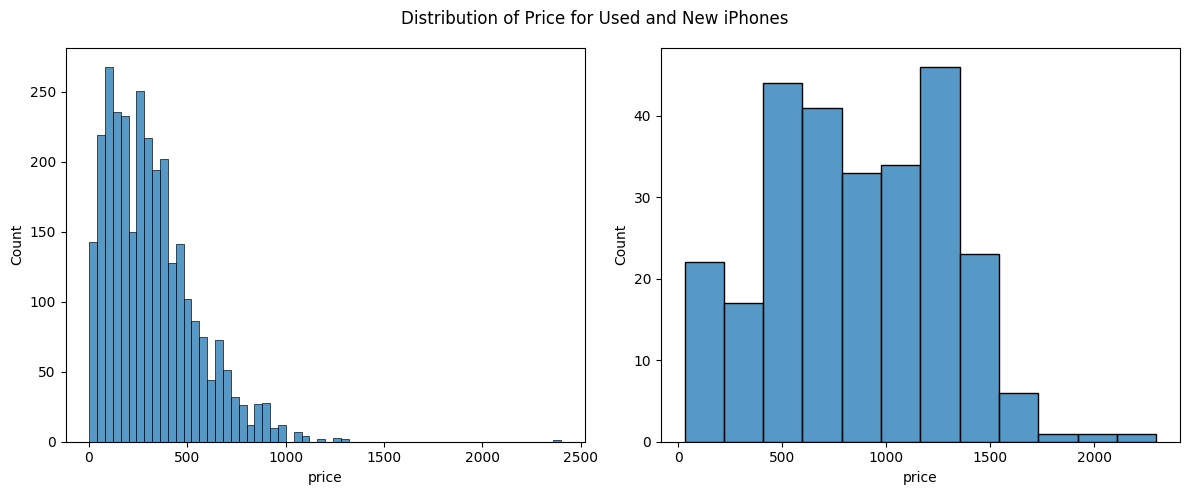

In [240]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=iphones[iphones['condition'] == 'Naudota'], x='price', ax=axes[0])

sns.histplot(data=iphones[iphones['condition'] == 'Nauja'], x='price', ax=axes[1])

fig.suptitle('Distribution of Price for Used and New iPhones')

plt.tight_layout()
plt.show()

After separating iPhones into used and new ones, we see that used iPhones dominate the market and follow a clearer distribution.

## Business insight deep-dive

Next, we will delve deeper into problems that were noticed when analysing variables individually and present solutions. They might lead to numerous improvements for the company.

### Problem: advert concentration in the big cities

We saw that most listings were heavily concentrated in big cities.

In [241]:
iphones['city'].value_counts().head()

city
Vilnius      1318
Kaunas        681
Klaipėda      264
Šiauliai      231
Panevėžys      93
Name: count, dtype: int64

In [242]:
iphones['city'].value_counts().head(5).sum() / iphones['city'].value_counts().sum()

np.float64(0.8099561678146525)

81% of listings are only active in the top 5 largest cities in Lithuania.

In [243]:
sum(iphones['city'].dropna().str.contains(',')) / iphones['city'].dropna().shape[0]

0.048215403882279274

Only 5% of sellers have marked 2 or more locations, meaning most iPhones are being sold in the big cities. If buyers filter adverts for their location, for example Vilnius district instead of Vilnius, many high quality listings might be skipped even though Vilnius district and Vilnius are not far from one another. This could be further investigated by checking if users whose IP location is on the ourskirts of a given city filter by the city or it's district. Sadly, that data is out of the scope of this project. Therefore, on the advert creation page we could add text that suggests sellers mark multiple cities.

To further check the performance of this feature, an A/B test could be implemented. In listings websites such as Skelbiu, the user journey for the seller usually goes from visiting the website, clicking 'Post Listing', uploading necessary listing information, posting and then waiting for buyers to become interested, and then selling the item. Our feature would be implemented right in the 'uploading necessary listing information' part of the journey. We would track how many buyers selected two or more cities. For that we would use a chi-square test and test a one-sided hypothesis

$$
H_0: \text{There are no differences between text classes};
$$

$$
H_1: \text{Additional text leads to more marked cities}.
$$

with $\alpha=0.05$. The chi-quare test is relevant because our outcome is binomial. Then, we would have to calculate the sample size and run the experiment for a week to avoid day-of-week biases.

### Problem: concentration of views

When we analysed views and likes, we saw that the top 5% of listings account for 50% views. This means that sellers are seeing adverts that are popular and the discovery rate for newer, less viewed listings is low.

This should be discussed with the Data Science team to make sure recommendation models are not too biased towards ads with large amount of views and are performing as they should and newer posts are being shown.

### Problem: iPhone mispricing & miscategorization

When we looked at the price distribution overall, we could not extract many insights because price is heavily dependant on the iPhone model. Therefore, we should examine at the price distribution of each model individually.

In [244]:
model_year = {
    "iPhone 3G": 2008,
    "iPhone 3GS": 2009,
    "iPhone 4": 2010,
    "iPhone 4S": 2011,
    "iPhone 5": 2012,
    "iPhone 5C": 2013,
    "iPhone 5S": 2013,
    "iPhone 6": 2014,
    "iPhone 6 Plus": 2014,
    "iPhone 6S": 2015,
    "iPhone 6S Plus": 2015,
    "iPhone 7": 2016,
    "iPhone 7 Plus": 2016,
    "iPhone 8": 2017,
    "iPhone 8 Plus": 2017,
    "iPhone X": 2017,
    "iPhone XR": 2018,
    "iPhone XS": 2018,
    "iPhone XS Max": 2018,
    "iPhone 11": 2019,
    "iPhone 11 Pro": 2019,
    "iPhone 11 Pro Max": 2019,
    "iPhone SE": 2016,
    "iPhone SE (2020)": 2020,
    "iPhone SE (2022)": 2022,
    "iPhone 12": 2020,
    "iPhone 12 mini": 2020,
    "iPhone 12 Pro": 2020,
    "iPhone 12 Pro Max": 2020,
    "iPhone 13": 2021,
    "iPhone 13 mini": 2021,
    "iPhone 13 Pro": 2021,
    "iPhone 13 Pro Max": 2021,
    "iPhone 14": 2022,
    "iPhone 14 Plus": 2022,
    "iPhone 14 Pro": 2022,
    "iPhone 14 Pro Max": 2022,
    "iPhone 15": 2023,
    "iPhone 15 Plus": 2023,
    "iPhone 15 Pro": 2023,
    "iPhone 15 Pro Max": 2023,
    "iPhone 16": 2024,
    "iPhone 16 Plus": 2024,
    "iPhone 16 Pro": 2024,
    "iPhone 16 Pro Max": 2024,
    "iPhone 16e": 2025,
    "iPhone 17": 2025,
    "iPhone 17 Pro": 2025,
    "iPhone 17 Pro Max": 2025,
    "iPhone Air": 2025
}

In [245]:
model_hierarchy = {
    "iPhone 3G": 0,
    "iPhone 3GS": 1,
    "iPhone 4": 0,
    "iPhone 4S": 1,
    "iPhone 5": 0,
    "iPhone 5C": 1,
    "iPhone 5S": 2,
    "iPhone 6": 0,
    "iPhone 6 Plus": 1,
    "iPhone 6S": 0,
    "iPhone 6S Plus": 1,
    "iPhone 7": 0,
    "iPhone 7 Plus": 1,
    "iPhone SE": 0,
    "iPhone 8": 0,
    "iPhone 8 Plus": 1,
    "iPhone X": 2,
    "iPhone XR": 0,
    "iPhone XS": 1,
    "iPhone XS Max": 2,
    "iPhone 11": 0,
    "iPhone 11 Pro": 1,
    "iPhone 11 Pro Max": 2,
    "iPhone SE (2020)": 0,
    "iPhone 12": 1,
    "iPhone 12 mini": 0,
    "iPhone 12 Pro": 2,
    "iPhone 12 Pro Max": 3,
    "iPhone 13": 1,
    "iPhone 13 mini": 0,
    "iPhone 13 Pro": 2,
    "iPhone 13 Pro Max": 3,
    "iPhone SE (2022)": 0,
    "iPhone 14": 1,
    "iPhone 14 Plus": 2,
    "iPhone 14 Pro": 3,
    "iPhone 14 Pro Max": 4,
    "iPhone 15": 1,
    "iPhone 15 Plus": 2,
    "iPhone 15 Pro": 3,
    "iPhone 15 Pro Max": 4,
    "iPhone 16": 1,
    "iPhone 16 Plus": 2,
    "iPhone 16 Pro": 3,
    "iPhone 16 Pro Max": 4,
    "iPhone 16e": 0,
    "iPhone 17": 1,
    "iPhone 17 Pro": 3,
    "iPhone 17 Pro Max": 4,
    "iPhone Air": 2
}

In [246]:
iphones = iphones.assign(model_hierarchy = iphones['model'].map(model_hierarchy))

In [247]:
iphones = iphones.assign(model_year = iphones['model'].map(model_year))

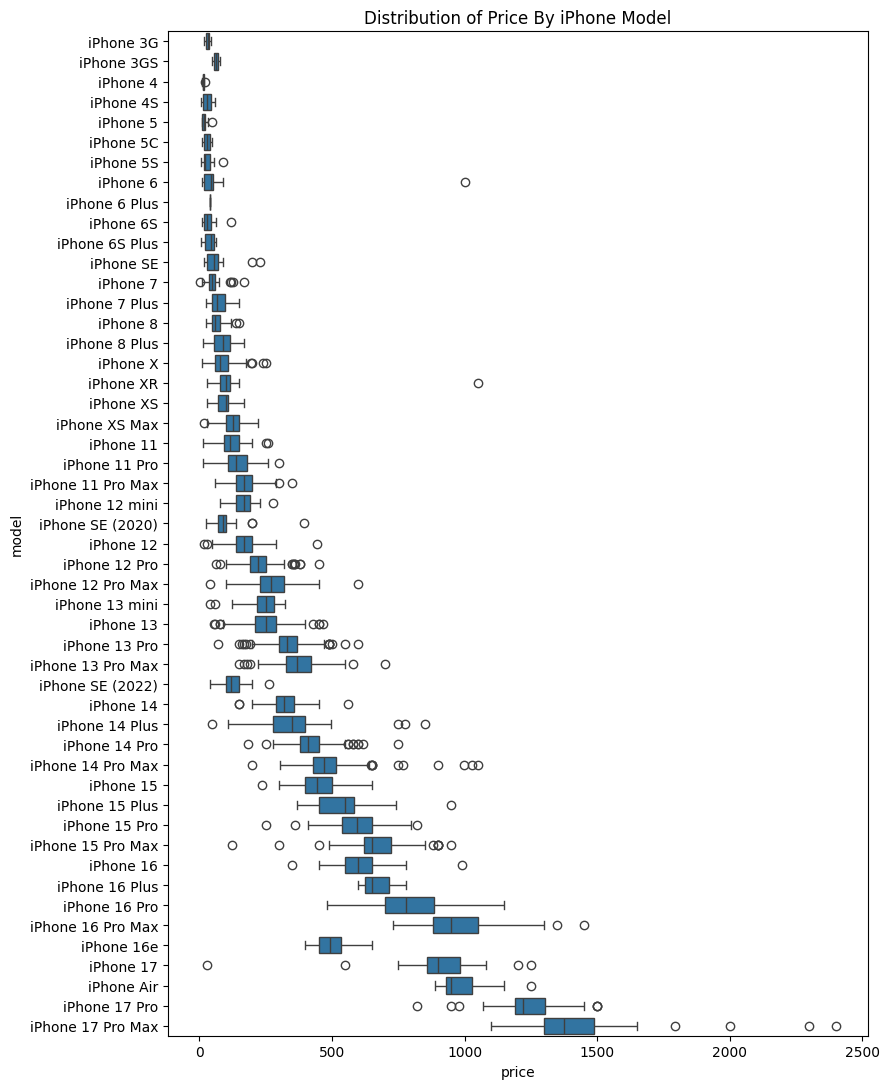

In [248]:
fig, ax = plt.subplots(1,1, figsize=(9,11))

sns.boxplot(data=iphones, x='price', y='model', order=iphones.sort_values(['model_year', 'model_hierarchy'])['model'])

ax.set_title('Distribution of Price By iPhone Model')

plt.tight_layout()
plt.show()

In every newer (2020+) iPhone category there outliers. Let's look at the outlier for the newest iPhone 17 model.

In [249]:
iphones[(iphones['price'] < 500) & (iphones['model'] == 'iPhone 17')]['description']

227    Iphone 17 magsafe deklai ir 5 stiklo apsaugos.
Name: description, dtype: object

The listing description states that what is being sold is not an iPhone, but accesories for it. This a clear case of miscatorization where the seller is trying improve the visibility of the listing by assigning it to a more popular category. This issue should be discussed with the team that is responsible for listing quality to check if this is a one-time occurance or platform-wide.

Let's try looking at only used iPhones.

In [250]:
used_iphones = iphones[iphones['condition'] == 'Naudota']

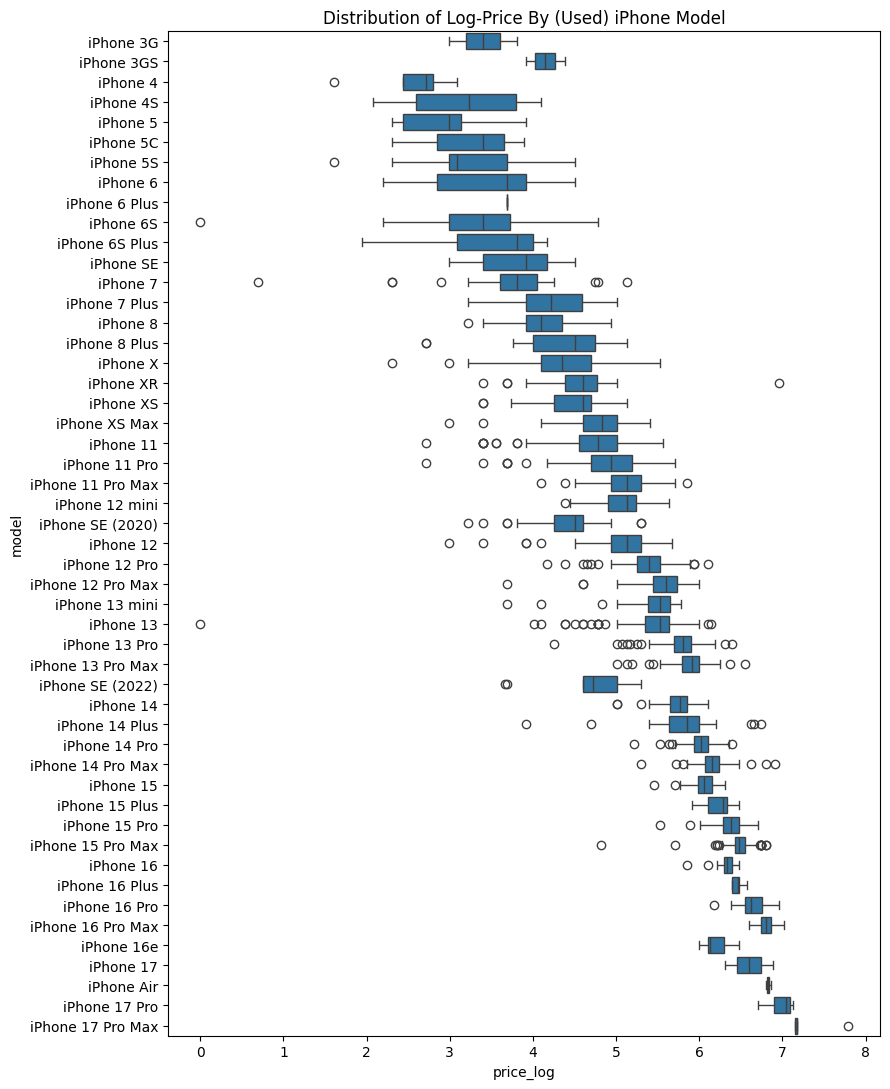

In [251]:
fig, ax = plt.subplots(1,1, figsize=(9,11))

sns.boxplot(data=used_iphones, x='price_log', y='model', order=iphones.sort_values(['model_year', 'model_hierarchy'])['model'])

ax.set_title('Distribution of Log-Price By (Used) iPhone Model')

plt.tight_layout()
plt.show()

Log-price distributions show that for the newer models the relative price variation is lower despite higher prices. When looking at used iPhone listings many outliers dissapear. From the charts it is difficult to examine if sellers are listing iPhones for optimal prices. We can use the median to check if iPhones are overpriced.

In [252]:
stat_metrics = (used_iphones
                .groupby(['model'])['price']
                .agg(['count', 'mean', 'std','median']))

In [253]:
used_iphones = used_iphones.merge(stat_metrics.reset_index(), on='model')

In [254]:
used_iphones['median_deviation'] = (used_iphones['price'] - used_iphones['median']) / used_iphones['median']

In [255]:
used_iphones[used_iphones['median_deviation'] > 0.25].shape[0]

380

There are a total of 380 iPhones that are priced 25% over the median listing price and could be considered overpriced. Customers are less likely to purchase items that are priced higher than normal.

To fix this issue, a new 'recommended' (suggested) price feature could be implemented in the listing creation screen for sellers. A recommended price could encourage sellers to list overpriced iPhones for lower prices. On the other hand, if an iPhone is considered underpriced or fairly-priced, a 'great price' icon that is only visible to buyers could be added.

### Problem: city-based price variance

When the sellers are individuals, based in different cities, and there is no one centralized distributer such as an e-commerce website, prices can be all over the place. Let's choose popular iPhone models and analyse them.

In [256]:
(used_iphones[(used_iphones['city'].isin(['Vilnius', 'Kaunas', 'Klaipėda'])) &
             (used_iphones['model'].isin(['iPhone 13', 'iPhone 14']))]
             .groupby(['city', 'model'])['price']
             .agg(['median', 'count']))

median  count
city     model                   
Kaunas   iPhone 13   240.0     51
         iPhone 14   287.5     34
Klaipėda iPhone 13   279.0     23
         iPhone 14   350.0     19
Vilnius  iPhone 13   250.0    107
         iPhone 14   310.0     41

The aggregated table shows that there are price differences when looking at the same iPhone model in different cities. At first glance, prices in Kaunas seem lowest for the iPhone 13 and 14 models. We can use a statistical test to check for price differences.

In [257]:
iphone_13_cities = used_iphones[
    (used_iphones['city'].isin(['Vilnius', 'Kaunas', 'Klaipėda'])) &
    (used_iphones['model'] == 'iPhone 13') &
    (~used_iphones['price'].isna())
]

We first have to check if the price distribution is normal. Parametric tests are more accurate than non-parametric ones, but we can't always use them.

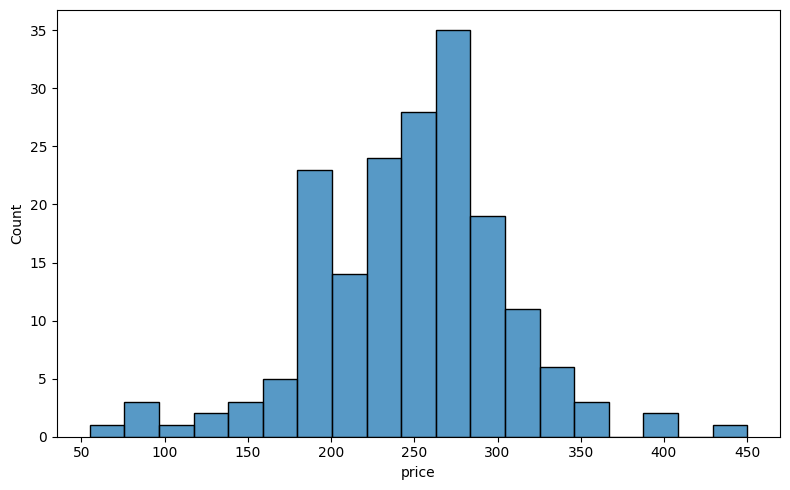

In [258]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

sns.histplot(data=iphone_13_cities, x='price')

plt.tight_layout()
plt.show()

In [259]:
shapiro_wilk = shapiro(iphone_13_cities['price'])
print(f"H: {shapiro_wilk.statistic} \np-value: {shapiro_wilk.pvalue:.6f}")

H: 0.9722955265034404 
p-value: 0.001144


Since the $\text{p-value} < 0.05 = \alpha$, we must reject the null hypothesis. Price distribution is not normal and parametric tests are out of limits. We can use the Kruskal-Wallis test, the equivalent of a one-sided non-parametric ANOVA, to test is the differences are statistically significant or are caused by randomness.

In [260]:
vilnius = iphone_13_cities.loc[iphone_13_cities['city'] == 'Vilnius', 'price'].values
kaunas = iphone_13_cities.loc[iphone_13_cities['city'] == 'Kaunas', 'price'].values
klaipeda = iphone_13_cities.loc[iphone_13_cities['city'] == 'Klaipėda', 'price'].values

print(f'Vilnius: {vilnius.size}\nKaunas: {kaunas.size}\nKlaipėda: {klaipeda.size}')

Vilnius: 107
Kaunas: 51
Klaipėda: 23


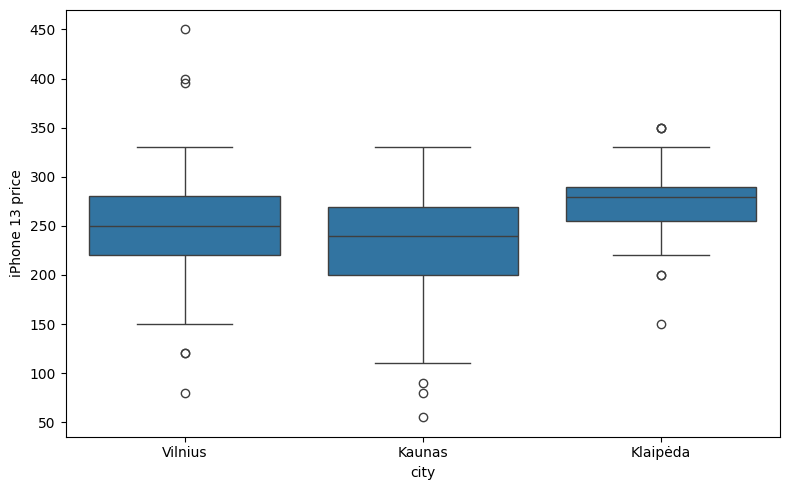

In [261]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

sns.boxplot(data=iphone_13_cities, x='city', y='price')

plt.ylabel('iPhone 13 price')

plt.tight_layout()
plt.show()

In [262]:
kruskal_wallis = kruskal(vilnius, kaunas, klaipeda)
print(f"H: {kruskal_wallis.statistic} \np-value: {kruskal_wallis.pvalue}")

H: 7.794778032316989 
p-value: 0.020294831806549753


Since the $\text{p-value} = 0.0202 < 0.05 = \alpha$, we must reject the null hypothesis. The price differences between cities for the iPhone 13 model are significant. Statistically, this confirms that location affects price for iPhone 13s and this is not caused by random chance. For the same model, we can perform [*post hoc*](https://stats.stackexchange.com/questions/246719/friedman-test-and-post-hoc-test-for-python) tests to find out which groups are different.

In [263]:
p_values = sp.posthoc_dunn([vilnius, kaunas, klaipeda], p_adjust='bonferroni')
p_values.index = ['Vilnius', 'Kaunas', 'Klaipėda']
p_values.columns = ['Vilnius', 'Kaunas', 'Klaipėda']
p_values

,Vilnius,Kaunas,Klaipėda
Vilnius,1.000000,0.315833,0.205809
Kaunas,0.315833,1.000000,0.017146
Klaipėda,0.205809,0.017146,1.000000


We see that the price difference is statistically significant for iPhone 13s only in Kaunas (240 euros) and Klaipėda (279 euros). Since Kaunas and Klaipėda are 200 km from one another, marking additional cities where a given phone can be sold (as suggested before) will not help equalize prices.

### Problem: high interest, but no sale

Before, we saw large concentration of views/likes for certain listings. Is there are reason why they are not being sold?

In [264]:
available_used = used_iphones[used_iphones['sold'] == False]

In [265]:
available_used['likes'].sort_values(ascending=False).head(10)

417     135.0
677     131.0
416     120.0
1931     83.0
931      82.0
678      77.0
1396     65.0
1797     59.0
666      58.0
381      57.0
Name: likes, dtype: float64

There are many iPhones in which buyers show high interest, but are not being sold.

In [266]:
available_used[available_used['likes'] == max(available_used['likes'])]

,id,name,maker,model,condition,price,city,views,likes,description,...,battery_health,sale_time_hours,price_log,model_hierarchy,model_year,count,mean,std,median,median_deviation
417,77861659.0,Apple iPhone 15,Apple,iPhone 15,Naudota,399.0,Vilnius,6000.0,135.0,Parduodu Apple iphone 15\nIdealios būklės tele...,...,90,NaN,5.988961,1,2023,86,429.209302,58.514376,424.5,-0.060071


In [267]:
available_used[available_used['likes'] == max(available_used['likes'])]['description']

417    Parduodu Apple iphone 15\nIdealios būklės tele...
Name: description, dtype: object

In [268]:
available_used[available_used['likes'] == max(available_used['likes'])]['seller_verified']

417    True
Name: seller_verified, dtype: bool

Looking at the listing with most likes, the advert seems genuine: images look real and of high quality, the seller is verified and the iPhone is also in good condition. Since this is unlikely a fake advert, this might signal that the sale conversion rate is low. The ultimate goal of an advertisement platform for sellers is to sell their products and some products might not be selling.

As suggested before, a 'recommended price' feature could prove useful here. Another useful way of increasing the conversion rate for 'hidden' listings would be suggesting (via website pop-up) to the seller to use platform features that increase advert visibility and offering discounted paid visibility features for a limited time. An A/B test could also be conducted in this case, measuring the click-through rate, to check if pop-ups are working.

### Problem: missing attributes in listings

During scraping we noticed that quite a few listings were missing either a price, a description, etc.

In [269]:
sum(iphones[['price', 'description', 'condition']].isna().any(axis=1))

231

231 listings have at least one missing attribute.

To solve this, a trivial change could be implemented. Above any of the attribute fields, for example description, suggestive text could be added stating how much faster listings with description get sold. We can calculate this manually.

In [270]:
iphones[iphones['sold'] == 1].shape[0]

116

In [271]:
iphones[(iphones['sold'] == 1) &
        (~iphones['description'].isna())].shape[0]

114

In [272]:
iphones[(iphones['sold'] == 1) &
        (~iphones['description'].isna())].shape[0] / iphones[iphones['sold'] == 1].shape[0]

0.9827586206896551

In the scraped dataset we have too few observations for iPhones that did not have a description and were sold. For illustrative purposes, we can simply state that 98% of listings that were sold had a description. In theory, more descriptions should be filled out. Of course, we could use an A/B test once again to make sure we do not clutter the UI.

Another option would be to create a simple scoring system which assigns points for every filled out field and uploaded photo to incentivise sellers to write more detailed descriptions or upload better photos.

## Insight summary

- **81% of listings were concentrated in TOP 5 cities** and only 5% of iPhones were available in 2 or more locations. To remedy the situation, **text suggesting sellers mark multiple locations should be added** in the listing creation page. The additional *text effectiveness should be tested with described A/B test*;

- TOP 5% of listings accounted for 50% of views, meaning that the discovery rate for some listings must be low. A discussion with the Data Science team is necessary to make sure recommendation models are not too biased towards ads with large amount of views and new posts are being shown;

- **380 iPhones were found to be overpriced (25% above median)**. A **'recommended price' feature could be implemented in the listing creation screen** for sellers. It would encourage sellers to list iPhones for lower prices. On the buyers' side, **an underpriced iPhone would receive a 'great price' icon**;

- Tests showed that **there were statistically significant differences between iPhone 13 prices in the TOP 3 cities for the same model**. Previously mentioned 'recommended price' feature could help equalize prices;

- **231 iPhone listings were missing either a price, a description or a phone condition**. A trivial solution is possible: adding suggestive text above the description input field stating that '98% of sold items had a description'. A more complex solution could be **implementing a scoring system that assigns points for every filled out field** and uploaded photo;

- Listings for iPhone accesories were found to be miscategorized in iPhone category in order to attract more views. Listing quality standarts should be discussed to check if this is a one-time occurance or a platform-wide problem.